  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.701e-04 ...  1.465e+01  1.500e+01]
        y: [[ 1.000e+00  1.000e+00 ...  1.631e+01  1.626e+01]
            [ 2.500e+02  2.500e+02 ...  3.853e+01  3.836e+01]
            [ 0.000e+00  1.414e-03 ...  9.300e+01  9.300e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002BD64F204F0>
 t_events: None
 y_events: None
     nfev: 686
     njev: 0
      nlu: 0


C:\Users\fehox169\AppData\Local\Temp\ipykernel_30728\2089314042.py:12: RuntimeWarning: invalid value encountered in double_scalars
  r_g = (1-(P/P_inh))**0.52 * m_max * (S/(K_s + S)) * C # growth rate


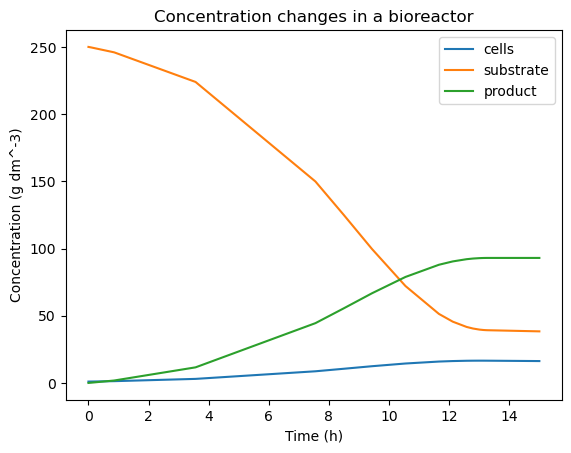

[ 0.31777116  0.31784631  0.31859873  0.32621419  0.41210298  0.88797654
  1.92776541  2.03372601  1.96667803  1.6053732   0.9607501   0.64197559
  0.31422454  0.16454047  0.01937976 -0.05964541 -0.0749762  -0.0901001
 -0.11957588 -0.12531636 -0.13099215 -0.14211172 -0.1528149  -0.15581693
 -0.15874618 -0.15989211 -0.16101959 -0.16320022 -0.16362012 -0.16403225
 -0.16480273 -0.16495343 -0.16509983 -0.16515678 -0.1652125  -0.16523437
 -0.16525593 -0.16529794 -0.16530612 -0.16531419 -0.16532998 -0.16534506
 -0.16535078 -0.16535189 -0.16535299 -0.16535512 -0.16535553 -0.16535594
 -0.16535674 -0.1653575  -0.16535778 -0.16535784 -0.16535789 -0.16535791
 -0.16535793 -0.16535798 -0.16535801 -0.16535804 -0.16535804 -0.16535804
 -0.16535804 -0.16535804 -0.16535804 -0.16535807 -0.16535807 -0.16535807
 -0.16535805 -0.16535785 -0.16535584 -0.16533581 -0.16513558 -0.16314661
 -0.16258365]


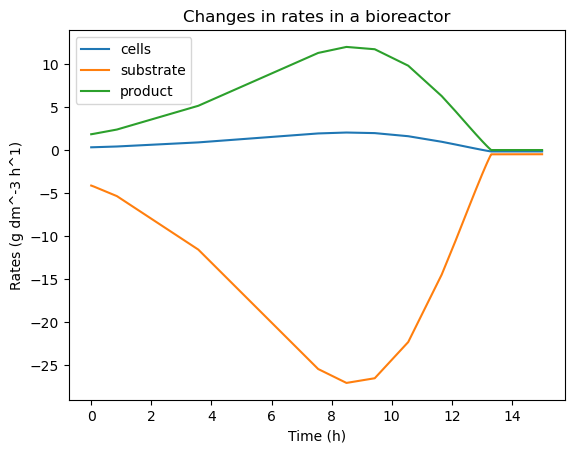

In [1]:
## solving with solve_ivp

import numpy as np   
from scipy.integrate import solve_ivp   
import matplotlib.pyplot as plt

# Define the kinetics model
def bioreactor(t, concentrations):
    C, S, P = concentrations # concentrations of substrate, cells, product
    
    # rate laws for basic cell reactions
    r_g = (1-(P/P_inh))**0.52 * m_max * (S/(K_s + S)) * C # growth rate
    r_m = m * C # cell maintenance
    r_d = k_d * C # cell death
    
    # rate laws for components
    dC_dt = r_g - r_d    # net cell concentration = growth - death
    dS_dt = -1/Y_cs * r_g - r_m    # substrate consumption = cell growth + maintenance
    dP_dt = Y_pc * r_g    # product production = growth associated production
    return[dC_dt, dS_dt, dP_dt]

# constants
P_inh = 93
m_max = 0.33
K_s = 1.7
m = 0.03
k_d = 0.01

Y_cs = 0.08
Y_pc = 5.6
    
# initial concentrations
C0 = 1    # inital cell concentration
S0 = 250    # initial substrate concentration
P0 = 0    # initial product concentration
    
# time span for simulation
t_span = (0, 15)

# solve with solve_ivp
solution = solve_ivp(bioreactor, t_span, [C0, S0, P0], dense_output=True)
print(solution)

# extract time and concentration from solution
t = solution.t
conc = solution.y

# if using interplant function to get smooth data
#t_eval = np.linspace(0, 15, 100)
#concentrations = solution.sol(t_eval)

# Extract components' concentrations and plot
C_t = conc[0]
S_t = conc[1]
P_t = conc[2]
plt.plot(t, C_t, label='cells')
plt.plot(t, S_t, label='substrate')
plt.plot(t, P_t, label='product')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g dm^-3)')
plt.legend()
plt.title('Concentration changes in a bioreactor')
#plt.xlim(10,15)
plt.show()

# Rates
rates = bioreactor(t, conc)
C_r = rates[0]
S_r = rates[1]
P_r = rates[2]
print(C_r)
plt.plot(t, C_r, label='cells')
plt.plot(t, S_r, label='substrate')
plt.plot(t, P_r, label='product')
plt.xlabel('Time (h)')
plt.ylabel('Rates (g dm^-3 h^1)')
plt.legend()
plt.title('Changes in rates in a bioreactor')
#plt.xlim(10,15)
plt.show()

C:\Users\fehox169\AppData\Local\Temp\ipykernel_30728\911030385.py:12: RuntimeWarning: invalid value encountered in double_scalars
  r_g = (1-(P/P_inh))**0.52 * m_max * (S/(K_s + S)) * C # growth rate


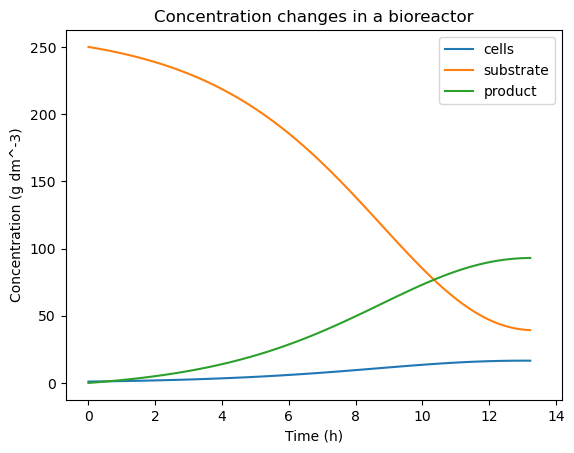

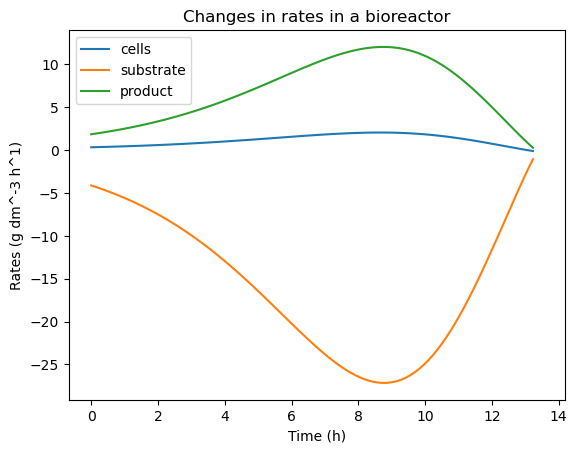

In [10]:
## solving with odeint

import numpy as np   
from scipy.integrate import odeint   
import matplotlib.pyplot as plt

# Define the kinetics model
def bioreactor(concentrations, t):
    C, S, P = concentrations # concentrations of substrate, cells, product
    
    # rate laws for basic cell reactions
    r_g = (1-(P/P_inh))**0.52 * m_max * (S/(K_s + S)) * C # growth rate
    r_m = m * C # cell maintenance
    r_d = k_d * C # cell death
    
    # rate laws for components
    dC_dt = r_g - r_d    # net cell concentration = growth - death
    dS_dt = -1/Y_cs * r_g - r_m    # substrate consumption = cell growth + maintenance
    dP_dt = Y_pc * r_g    # product production = growth associated production
    return[dC_dt, dS_dt, dP_dt]

# constants
P_inh = 93
m_max = 0.33
K_s = 1.7
m = 0.03
k_d = 0.01

Y_cs = 0.08
Y_pc = 5.6
    
# initial concentrations
C0 = 1    # inital cell concentration
S0 = 250    # initial substrate concentration
P0 = 0    # initial product concentration
    
# time points for simulation
# going above t = 13.2957 gives errors
# going t = 14 or above gives discontinuities and more
t = np.linspace(0, 13.5, 100)

# solve with odeint
solution = odeint(bioreactor, [C0, S0, P0], t)
#print(solution)

# Extract components' concentrations and plot
C_t = solution[:, 0]
S_t = solution[:, 1]
P_t = solution[:, 2]
plt.plot(t, C_t, label='cells')
plt.plot(t, S_t, label='substrate')
plt.plot(t, P_t, label='product')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g dm^-3)')
plt.legend()
plt.title('Concentration changes in a bioreactor')
# plt.xlim(10,15)
plt.show()

# Rates
conc = [C_t, S_t, P_t]
rates = bioreactor(conc, t)
C_r = rates[0]
S_r = rates[1]
P_r = rates[2]
plt.plot(t, C_r, label='cells')
plt.plot(t, S_r, label='substrate')
plt.plot(t, P_r, label='product')
plt.xlabel('Time (h)')
plt.ylabel('Rates (g dm^-3 h^1)')
plt.legend()
plt.title('Changes in rates in a bioreactor')
#plt.xlim(10,15)
plt.show()